In [2]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt

from RachbaJunction import RachbaJunction
from RachbaJunction.utilities import *
from RachbaJunction.ScatteringMatrix import ScatteringMatrix

ev_to_j = 1.602176634e-19

hbar = 6.582119569e-16
m = 0.015*cc.m_e
h_xy = 0.1e-3*ev_to_j# mJ

# k_z = np.sqrt(2*m*h_xy/ev_to_j)/hbar
k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr


x = 500e-9# Metr
x_prime =  k_z*x# adimensional
print(f"k_so {k_z}")
print(f"x' {x_prime}")

k_so 6274572.777578376
x' 3.137286388789188


# $E_{so, ext} \gg h_\perp$

## T vs E at constant $\alpha_{int}/\alpha_{ext}$

In [2]:
en = np.arange(-2, 2, 0.001)
# en = np.arange(-2, 2, 0.0011)

alp_r = 8
# x = x_prime/2
# x = 3.3
x = 8
# x = 0.001

Eso_profile = [alp_r, -1, alp_r]
x_profile = [-x, x]
# x_profile = [-5, 5]


ScatteringMatrix.unity_tol = 1e-6
junction = RachbaJunction()

junction.interface = x_profile
junction.alpha_profile = Eso_profile

trasmission_coeff_total = []

alp = [-4, 4, -0.4, 0.4, -0.2, 0.2, np.finfo(np.float64).eps]
# alp = [np.finfo(np.float64).eps]
# alp = [-4, 4]



lbl = []


for a in alp:
#     print(a)
    trasmission_coeff_tmp = []
    lbl.append(f"{a}")
    for i in en:
        if i < -1 and -np.abs(a)*(1+(1/(2*np.abs(a)))**2) > i:
            trasmission_coeff_tmp.append(np.nan)
        else:
            junction[1] = a
            S = junction.get_scattering_matrix(i)
            if not S.is_unitary:
                print(f"{a}, {i} {-np.abs(a)*(1+(1/(2*np.abs(a)))**2)} isn't unitary")
                trasmission_coeff_tmp.append(np.nan)
            else:
                trasmission_coeff_tmp.append(S.t_coef)
        
    trasmission_coeff_total.append(trasmission_coeff_tmp)


Scattering matrix isn't unitary
-0.2, -1.0000000000001101 -1.4500000000000002 isn't unitary
Scattering matrix isn't unitary
0.2, -1.0000000000001101 -1.4500000000000002 isn't unitary
Scattering matrix isn't unitary
2.220446049250313e-16, -1.0000000000001101 -1125899906842624.0 isn't unitary


<IPython.core.display.Javascript object>


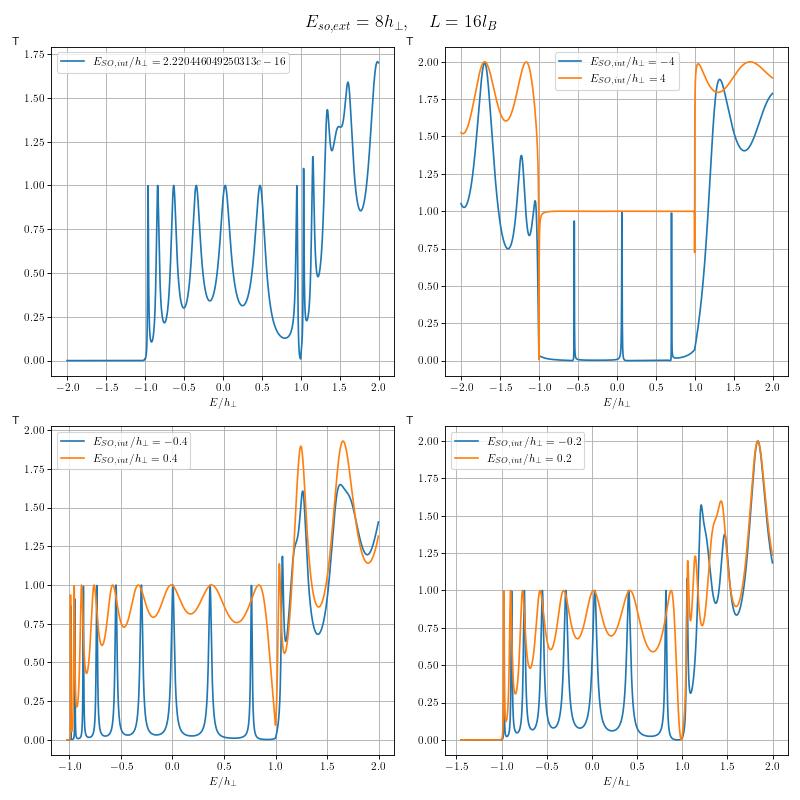

In [3]:
# %matplotlib inline
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

# for i in range(len(trasmission_coeff_total)):
i = -1
axs[0,0].plot(en, trasmission_coeff_total[i], label=fr"$$ E_{{SO,int}}/ h_{{\perp}} = {lbl[i]}$$")
# axs[0,0].set_xlabel(r"$$E/ h_{\perp}$$")
# axs[0,0].set_ylabel("T")

n = len(trasmission_coeff_total)
j = 1
for i in range(n//2+1):
    if i != 0:
        axs[i//2, i%2].plot(en, trasmission_coeff_total[j-1], label=fr"$$ E_{{SO,int}}/ h_{{\perp}} = {lbl[j-1]}$$")
        axs[i//2, i%2].plot(en, trasmission_coeff_total[j], label=fr"$$ E_{{SO,int}}/ h_{{\perp}} = {lbl[j]}$$")
        j += 2
    
#     axs[i//2, i%2].set_title(fr"$$ E_{{SO, L}}/ h_{{\perp}} = {lbl[i]}$$")
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid(True)#which='both')
    axs[i//2, i%2].set_xlabel(r"$$E/ h_{\perp}$$")
    axs[i//2, i%2].set_ylabel("T", loc = 'top', rotation=0)

fig.suptitle(fr"$$E_{{so, ext}}= {alp_r} h_\perp ,\quad L = {2*x} l_B$$", fontsize=16)
      
# plt.savefig("T(E) at cconstant E_SO(3 regions).png", transparent = False)
plt.show()

# $E_{so,ext} \ll h_\perp$

## T vs E at constant $\alpha_{int}/\alpha_{ext}$

In [10]:
en = np.arange(-0.99, 2, 0.0011)
# en = np.arange(0.999, 1.0002, 0.0000011)

alp_r = 0#np.finfo(np.float64).eps#0.08
x = 3.5/2
Eso_profile = [alp_r, -1, alp_r]
x_profile = [-x, x]

ScatteringMatrix.unity_tol = 1e-5
junction = RachbaJunction()

junction.interface = x_profile
junction.alpha_profile = Eso_profile

trasmission_coeff_total = []
alp = [-3.5, 3.5, -0.4, 0.4, -0.2, 0.2, np.finfo(np.float64).eps]
lbl = []


for a in alp:
    trasmission_coeff_tmp = []
    lbl.append(f"{a}")
    for i in en:
        junction[1] = a
        S = junction.get_scattering_matrix(i)
        if not S.is_unitary:
            print(f"{a}, {i} isn't unitary")
            trasmission_coeff_tmp.append(np.nan)
        else:
            trasmission_coeff_tmp.append(S.t_coef)
        
    trasmission_coeff_total.append(trasmission_coeff_tmp)


<IPython.core.display.Javascript object>


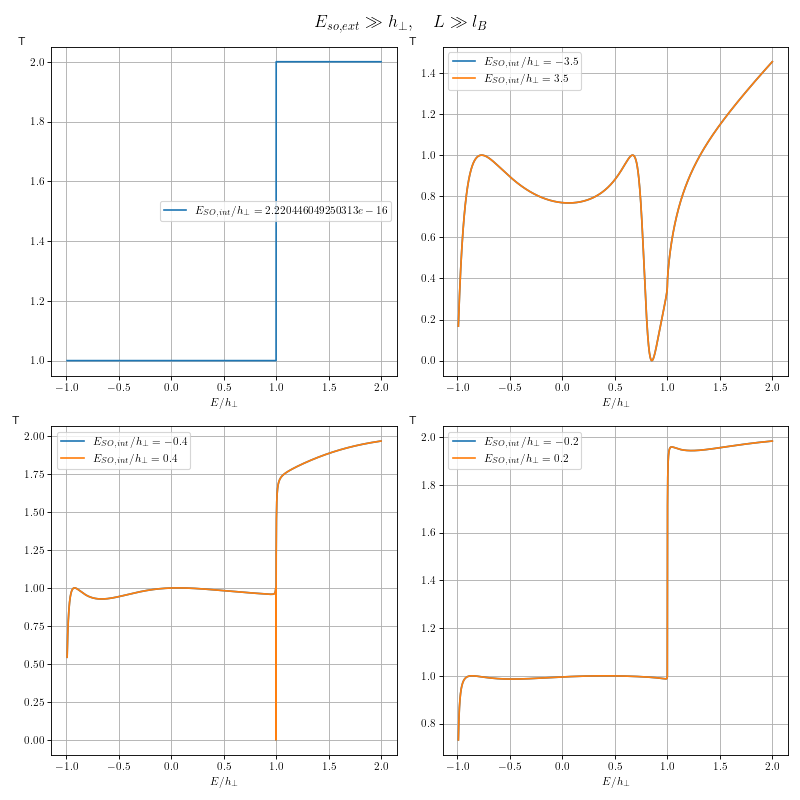

In [11]:
# %matplotlib inline
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

# for i in range(len(trasmission_coeff_total)):
i = -1
axs[0,0].plot(en, trasmission_coeff_total[i], label=fr"$$ E_{{SO,int}}/ h_{{\perp}} = {lbl[i]}$$")
# axs[0,0].set_xlabel(r"$$E/ h_{\perp}$$")
# axs[0,0].set_ylabel("T")

n = len(trasmission_coeff_total)
j = 1
for i in range(n//2+1):
    if i != 0:
        axs[i//2, i%2].plot(en, trasmission_coeff_total[j-1], label=fr"$$ E_{{SO,int}}/ h_{{\perp}} = {lbl[j-1]}$$")
        axs[i//2, i%2].plot(en, trasmission_coeff_total[j], label=fr"$$ E_{{SO,int}}/ h_{{\perp}} = {lbl[j]}$$")
        j += 2
    
#     axs[i//2, i%2].set_title(fr"$$ E_{{SO, L}}/ h_{{\perp}} = {lbl[i]}$$")
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid(True)#which='both')
    axs[i//2, i%2].set_xlabel(r"$$E/ h_{\perp}$$")
    axs[i//2, i%2].set_ylabel("T", loc = 'top', rotation=0)

fig.suptitle(r"$$E_{so, ext} \gg h_\perp ,\quad L \gg l_B$$", fontsize=16)
      
# plt.savefig("T(E) at cconstant E_SO(3 regions).png", transparent = False)
plt.show()